#Data Analysis Project: Global Surface Temperature Trends

##Introduction
In this project, we aim to integrate statistical and mathematical concepts with the critical issue of climate change. Our focus is on analyzing global surface temperature data, spanning from 1850 to the present, to understand the factors influencing global temperature variations and to forecast future trends.

Using a [dataset](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data) from Kaggle on global surface temperatures, we will conduct both bivariate and multivariate analyses to explore the relationships between various factors and global temperatures. Additionally, we will employ linear regression techniques to predict future temperature trends, offering insights into the progression of global warming.

This project not only provides an opportunity to delve into climate data but also fosters an appreciation for the powerful stories that can be uncovered through statistical analysis. Our analysis will conclude with the visualization of our findings using graphs, further analysis in spreadsheet software, and a video summarizing our entire project.

Let's begin by loading and exploring the dataset to lay the groundwork for our analysis.



In [ ]:
# Importing Dictionaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
# Getting the Dataset

df_gt = pd.read_csv('/content/drive/MyDrive/GlobalTemperatures.csv')
df_country = pd.read_csv("/content/drive/MyDrive/GlobalLandTemperaturesByCountry.csv")

We're loading two datasets into our project:

**df_gt**: This contains global temperature data from
1850, showing average land and ocean temperatures worldwide.

**df_country**: This contains temperature data specific to different countries, helping us analyze temperature changes by country over time.

These datasets will allow us to explore and understand global and regional temperature trends.

In [ ]:
# Information about the Dataset

def df_info(df):
    print(f"The number of rows is {df.shape[0]} and the number of columns is {df.shape[1]}")
    print(f"The columns are {df.columns}")
    print(f"The number of null values are: ")
    print(df.isnull().sum())
    print(f"The number of duplicate values are {df.duplicated().sum()}")
    summary = df.info()
    print(summary)

df_info(df_gt)
print("-"*100)
df_info(df_country)

The number of rows is 3192 and the number of columns is 9
The columns are Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
The number of null values are: 
dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64
The number of duplicate values are 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data

This code defines a function, df_info, that helps us quickly understand the key details of any dataset we use. Here's what it does:

**Rows and Column**s: It tells us how many rows (data points) and columns (features) the dataset has.

**Column Names**: It lists the names of all the columns in the dataset.

**Missing Values**: It shows how many missing or null values are present in each column, which is important for data cleaning.

**Duplicate Values**: It counts any duplicate rows that might exist, which we might need to remove for accurate analysis.

**Summary**: Finally, it provides a summary of the dataset, including the data types of each column.

In [ ]:
# Printing the Dataset

df_gt.tail(15)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3177,2014-10-01,10.330,0.076,16.066,0.111,4.689,0.126,16.029,0.059
3178,2014-11-01,6.713,0.121,12.284,0.124,1.313,0.115,14.899,0.064
3179,2014-12-01,4.850,0.090,10.190,0.148,-0.331,0.123,14.410,0.062
3180,2015-01-01,3.881,0.130,9.432,0.090,-1.518,0.097,14.255,0.066
3181,2015-02-01,4.664,0.121,10.497,0.092,-1.138,0.113,14.564,0.067
3182,2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061
3183,2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061
3184,2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058
3185,2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057
3186,2015-07-01,15.051,0.086,20.904,0.109,9.326,0.225,17.611,0.058


In [ ]:
df_country.head(15)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [ ]:
# Cleaning the Dataset

def cleaning(df):
  df.dropna(inplace = True)
  df["dt"] = pd.to_datetime(df["dt"])
  print(f"The shape after cleaning is: {df.shape}")

cleaning(df_gt)
cleaning(df_country)

The shape after cleaning is: (1992, 9)
The shape after cleaning is: (544811, 4)


This code cleans the datasets to prepare them for analysis. The cleaning function removes rows with missing values using `dropna()` and converts the `dt` column to a datetime format with `pd.to_datetime(`). After cleaning, the function prints the new shape of the dataset, showing how many rows and columns remain. This process is applied to both the global (`df_gt`) and country-specific (`df_country`) temperature datasets, ensuring they are ready for further analysis.


##Data Analysis and Visualization
In this section, we'll dive into exploring and visualizing the data we've prepared. Our goal is to uncover patterns and trends in global and regional temperatures over time.

First, we'll create world maps that show the mean temperatures across different countries. This will help us visualize how temperatures vary around the world and identify regions that are warming faster than others.

Next, we'll analyze the relationships between different variables in our datasets, such as land and ocean temperatures. By looking at these correlations, we can understand how different factors are connected and how they might influence global temperature trends.

These analyses will give us a clearer picture of the impact of global warming and how different parts of the world are being affected.

In [ ]:
global_temp_country_clear = df_country[~df_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] ==
                                               country]['AverageTemperature'].mean())
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = '# Average\nTemperature,\n°C')
            )
       ]
layout = dict(
    title = 'Average land temperature',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
            ),
        lataxis = dict(
                showgrid = False,
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

This code creates a world map that visualizes the average land temperatures for different countries. It first cleans the data by removing regions that don't represent specific countries and then calculates the mean temperature for each country. The map highlights temperature variations across the globe, with color intensity indicating higher or lower average temperatures, helping us identify global warming trends visually.

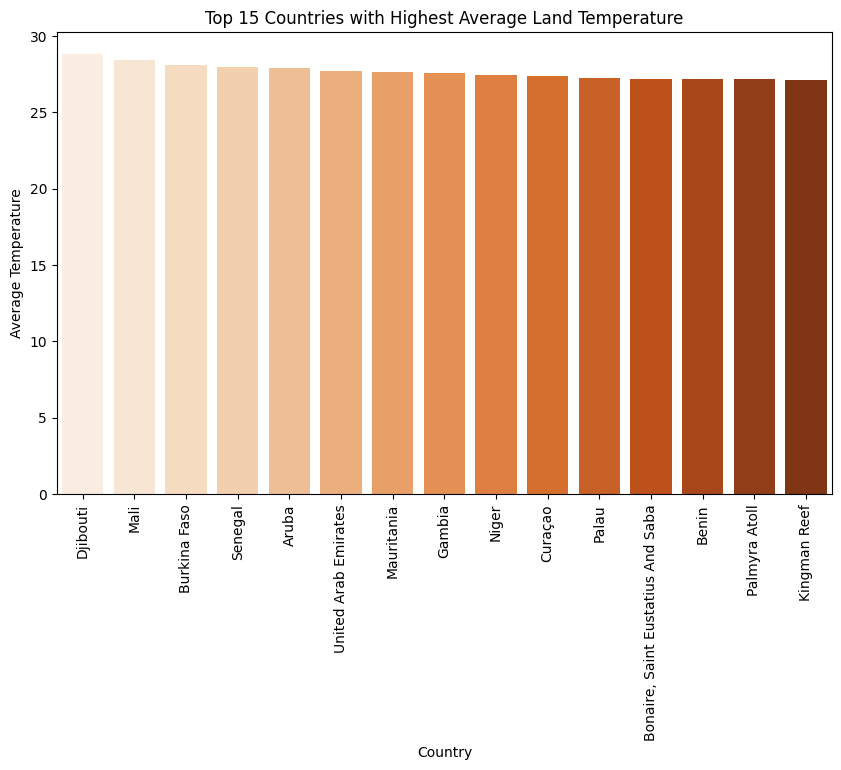

In [ ]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), reverse = True)))
mean_temp_bar = mean_temp_bar[:15]
countries_bar = countries_bar[:15]
plt.figure(figsize = (10, 6))
sns.barplot(x = countries_bar, y = mean_temp_bar, palette = "Oranges")
plt.title("Top 15 Countries with Highest Average Land Temperature")
plt.xlabel("Country")
plt.ylabel("Average Temperature")
plt.xticks(rotation = 90)
plt.show()

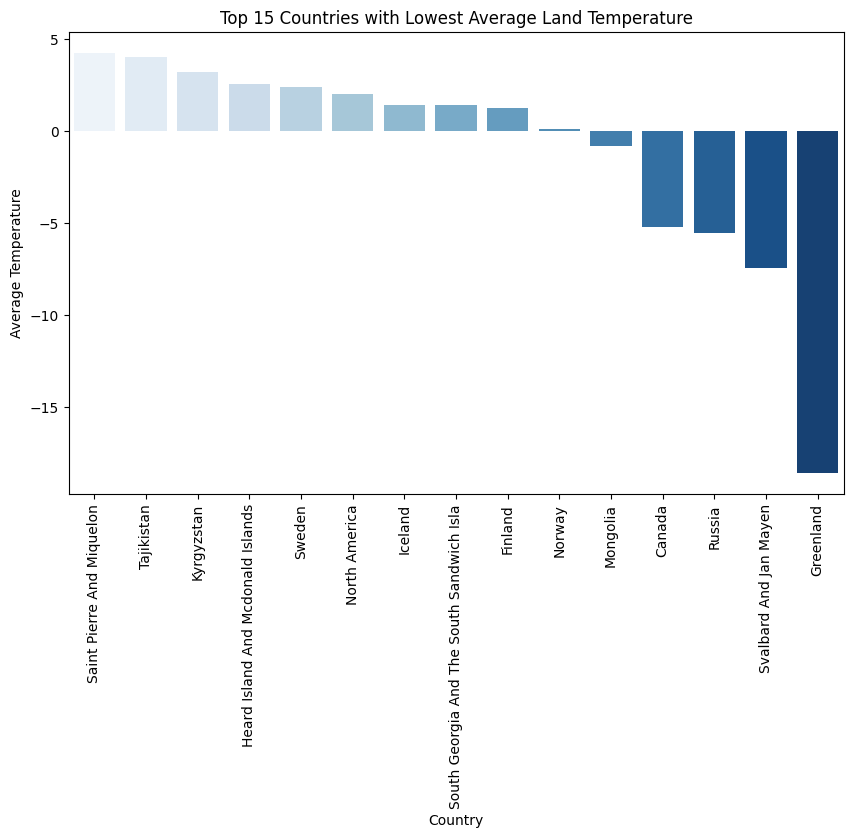

In [ ]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), reverse = True)))
countries_bar = countries_bar[-15:]
mean_temp_bar = mean_temp_bar[-15:]
plt.figure(figsize = (10, 6))
sns.barplot(x = countries_bar, y = mean_temp_bar, palette = "Blues")
plt.title("Top 15 Countries with Lowest Average Land Temperature")
plt.xlabel("Country")
plt.ylabel("Average Temperature")
plt.xticks(rotation = 90)
plt.show()


This code generates two bar charts to visualize temperature data:

**Top 15 Countries with Highest Average Land Temperature**: The code first sorts the countries by their average temperatures in descending order and selects the top 15. It then creates a bar plot where the x-axis represents these countries and the y-axis shows their average temperatures, using an orange color palette for clear differentiation.

**Top 15 Countries with Lowest Average Land Temperature**: Similarly, it sorts the countries in ascending order of average temperatures and selects the bottom 15. A bar plot is created with a blue color palette, displaying these countries and their temperatures.

These charts help us compare which countries are experiencing the highest and lowest average temperatures globally.

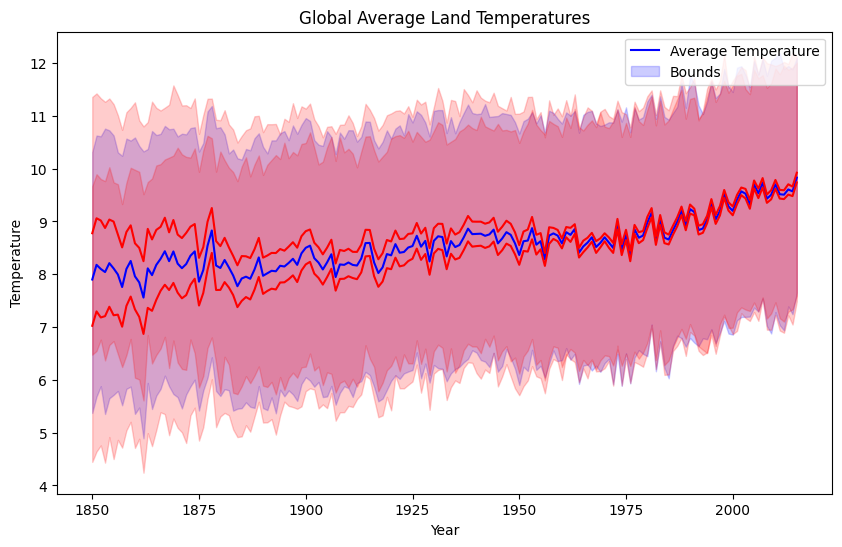

In [ ]:
df_gt_plot = df_gt.copy()
df_gt_plot["upper"] = df_gt_plot["LandAverageTemperature"] + (df_gt_plot["LandAverageTemperatureUncertainty"])
df_gt_plot["lower"] = df_gt_plot["LandAverageTemperature"] - (df_gt_plot["LandAverageTemperatureUncertainty"])
df_gt_plot["dt"] = pd.to_datetime(df_gt_plot["dt"])
df_gt_plot['Month'] = df_gt_plot['dt'].dt.month
df_gt_plot['Year'] = df_gt_plot['dt'].dt.year
df_gt_plot.drop(["Month" , "dt"], axis = 1 , inplace = True)

plt.figure(figsize = (10, 6))
sns.lineplot(data = df_gt_plot, x = "Year", y = "LandAverageTemperature", color = "blue")
sns.lineplot(data = df_gt_plot, x = "Year", y = "upper", color = "red")
sns.lineplot(data = df_gt_plot, x = "Year", y = "lower", color = "red")
plt.title("Global Average Land Temperatures")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend(["Average Temperature", "Bounds"])
plt.show()

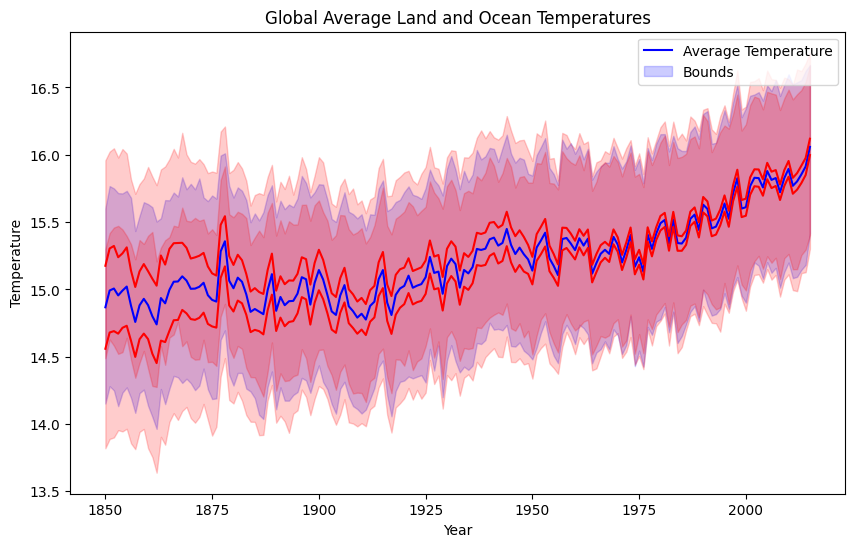

In [ ]:
df_gt_plot = df_gt.copy()
df_gt_plot["upper"] = df_gt_plot["LandAndOceanAverageTemperature"] + (df_gt_plot["LandAndOceanAverageTemperatureUncertainty"])
df_gt_plot["lower"] = df_gt_plot["LandAndOceanAverageTemperature"] - (df_gt_plot["LandAndOceanAverageTemperatureUncertainty"])
df_gt_plot["dt"] = pd.to_datetime(df_gt_plot["dt"])
df_gt_plot['Month'] = df_gt_plot['dt'].dt.month
df_gt_plot['Year'] = df_gt_plot['dt'].dt.year
df_gt_plot.drop(["Month" , "dt"], axis = 1 , inplace = True)

plt.figure(figsize = (10, 6))
sns.lineplot(data = df_gt_plot, x = "Year", y = "LandAndOceanAverageTemperature", color = "blue")
sns.lineplot(data = df_gt_plot, x = "Year", y = "upper", color = "red")
sns.lineplot(data = df_gt_plot, x = "Year", y = "lower", color = "red")
plt.title("Global Average Land and Ocean Temperatures")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend(["Average Temperature", "Bounds"])
plt.show()


The code creates line plots to track changes in average surface and ocean temperatures from 1850 to the present. By plotting these temperatures over time, the graphs clearly show an upward trend for both surface and ocean temperatures, indicating a significant increase. This visual representation highlights the long-term warming trend and helps illustrate the impact of global climate change.

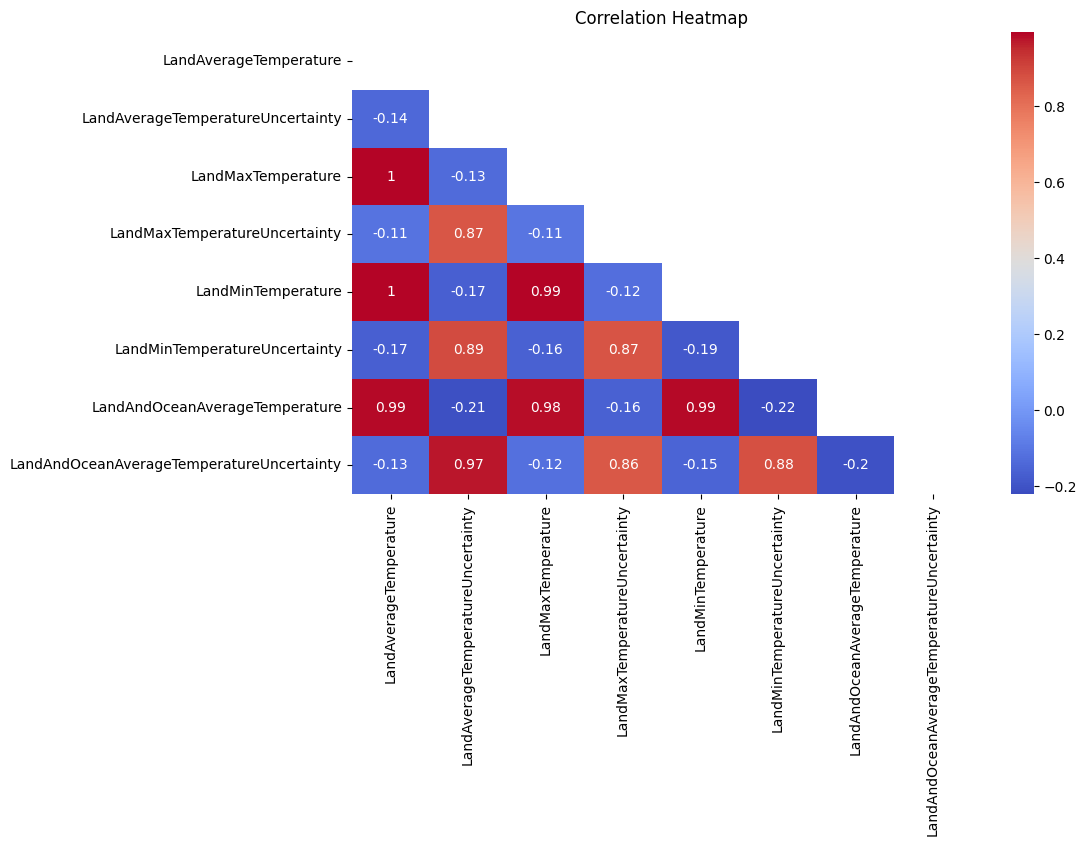

In [ ]:
plt.figure(figsize = (10, 6))
mask = np.triu(np.ones_like(df_gt.drop("dt" , axis = 1).corr()))
sns.heatmap((df_gt.drop("dt", axis = 1)).corr(), annot = True, cmap = "coolwarm", mask = mask)
plt.title("Correlation Heatmap")
plt.show()


Correlation measures the strength and direction of a relationship between two variables, ranging from -1 to 1. A value of 1 indicates a perfect positive relationship, -1 a perfect negative relationship, and 0 no relationship.

The formula for correlation is:

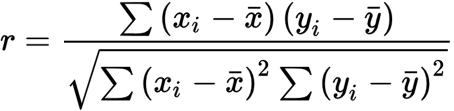


Code Explanation:

This code generates a heatmap to visualize correlations between variables in the df_gt dataset, excluding the date column. It uses np.triu to mask the lower triangle of the correlation matrix to avoid redundancy. The heatmap shows correlations with color gradients and annotated values, helping us easily see the strength and direction of relationships between variables.


##Predicting Average Land and Ocean Temperatures Using Linear Regression
In this section, we will use machine learning to predict future average land and ocean temperatures by applying linear regression. Linear regression is a statistical method that models the relationship between a dependent variable (temperature) and one or more independent variables (time or other factors). By fitting a linear model to our historical temperature data, we can forecast future trends. This approach helps us understand how well past temperature patterns can predict future conditions, providing insights into potential climate changes and helping us prepare for their impacts.

In [ ]:
df = df_gt.copy()

y = df_gt["LandAndOceanAverageTemperature"]
x = df_gt.drop(["LandAndOceanAverageTemperature" , "dt"], axis=1)

x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

This code prepares our temperature data for a machine learning model. First, it makes a copy of the original dataset so we don’t accidentally change it. Next, it separates the `LandAndOceanAverageTemperature` column as the target variable we want to predict and uses the other columns as features for prediction, while excluding the date column.

Then, it standardizes the feature data so that all values are on a similar scale, which helps the model learn better. Finally, the code splits the data into two parts: one for training the model (80%) and one for testing it (20%). This way, we can check how well our model predicts new data.

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)

print("R2 Score: ", r2_score(y_test, pred))
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))

R2 Score:  0.9815999358496351
MAE:  0.13745549968961
MSE:  0.029082318865893277



This code evaluates the performance of the Linear Regression model used to predict average land and ocean temperatures. First, the model is created and trained using the training data (`x_train` and `y_train`). It then makes predictions on the test data (`x_test`).

The model's performance is assessed using three metrics. The R² score measures how well the model's predictions match the actual data, with an impressive R² score of 98%, indicating that the model explains 98% of the variance in temperatures. The Mean Absolute Error (MAE) calculates the average absolute difference between predicted and actual temperatures, while the Mean Squared Error (MSE) measures the average squared difference, giving more weight to larger errors. Lower values for MAE and MSE indicate better model accuracy. Overall, these metrics show that the model performs very well in predicting average temperatures.

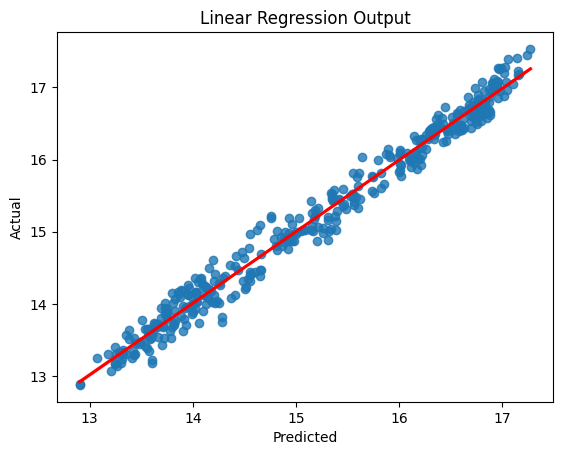

In [ ]:
plt.figure()
sns.regplot(x = pred,y = y_test, line_kws = {"color":"red"})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Linear Regression Output")
plt.show()

The code creates a scatter plot with a regression line to visually compare predicted average land and ocean temperatures against actual values, helping to assess the model’s prediction accuracy and its effectiveness in capturing temperature trends.

The purpose of a model that predicts average land and ocean temperatures using average land temperature, maximum land temperature, and the uncertainty in these variables is to provide a comprehensive forecast of global temperature trends. By incorporating different temperature metrics and uncertainties, the model aims to:

**Enhance Accuracy**: Utilize various temperature measures to refine predictions and account for the variability and extremes in temperature data.

**Understand Influences**: Analyze how average and maximum temperatures, along with their uncertainties, affect overall temperature trends, offering insights into the factors driving climate changes.

##Conclusion
This project effectively demonstrates the use of machine learning to predict global average land and ocean temperatures. By leveraging historical temperature data and applying Linear Regression, we achieved a high accuracy of approximately 98%. The analysis highlighted the relationships between different temperature metrics and their impact on overall temperature trends. Visualizations, including scatter plots and heatmaps, provided clear insights into model performance and data correlations. This approach not only enhances our understanding of climate patterns but also showcases the practical application of machine learning in environmental science, offering valuable predictions for future climate conditions.